# [UCI ML Repo - credit card defaults](http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#)
## Preprocessing
### Platform: Python 3, colab.research.google.com

In [0]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [0]:
sns.set(style='whitegrid', context='notebook')

## Load data

In [96]:
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/uci-credit-card-defaults/data/defaults.csv", header=[1])
data.shape

(30000, 25)

In [98]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [99]:
data.tail(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


## Exploration

In [100]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [101]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


0 ID


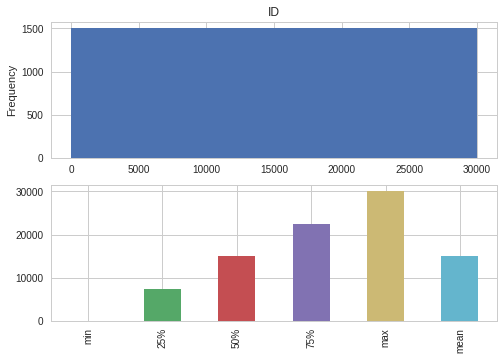

1 LIMIT_BAL


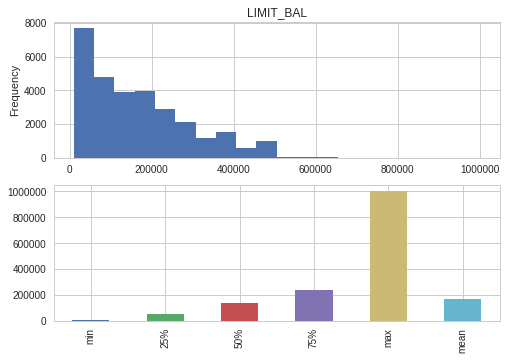

2 SEX


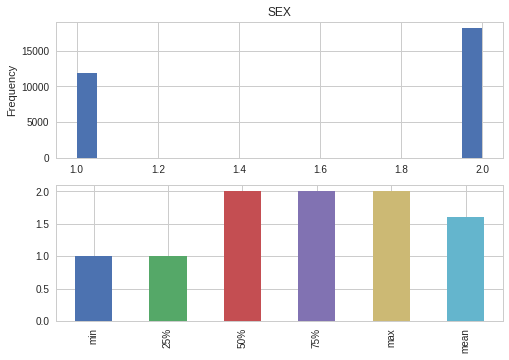

3 EDUCATION


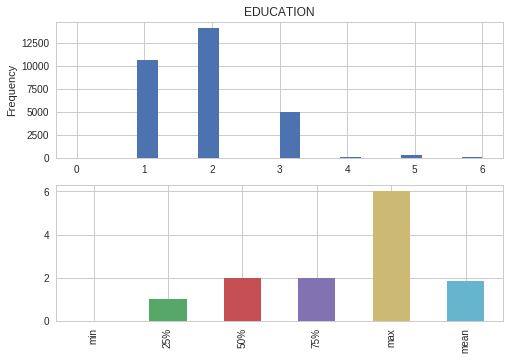

4 MARRIAGE


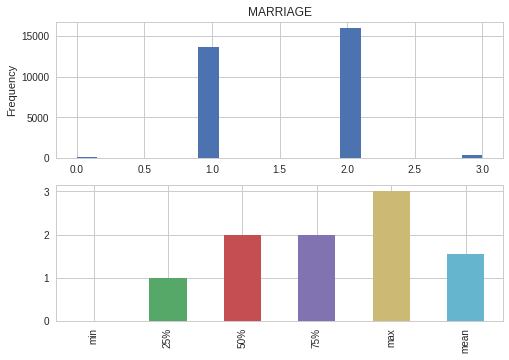

5 AGE


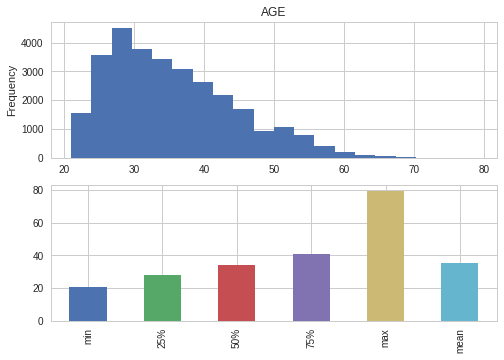

6 PAY_0


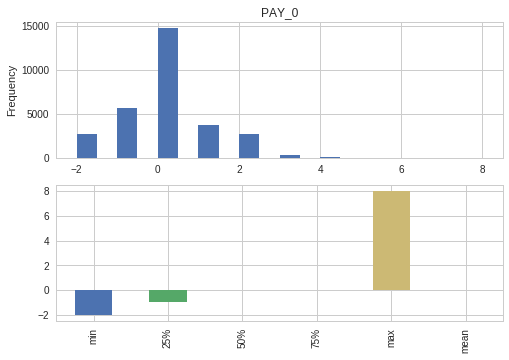

7 PAY_2


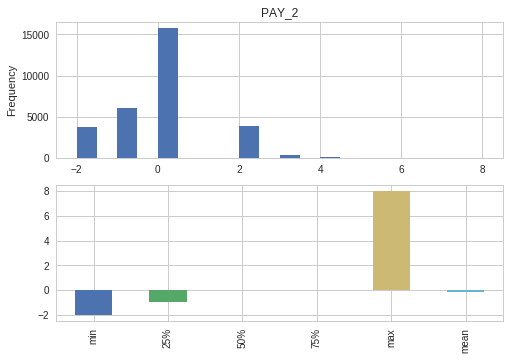

8 PAY_3


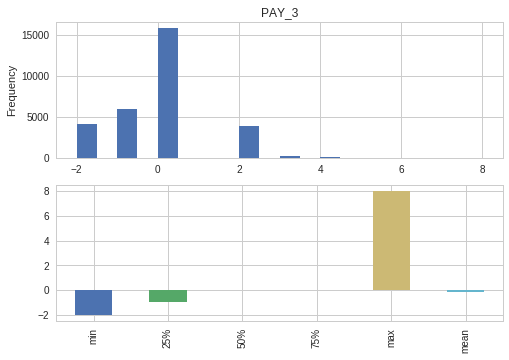

9 PAY_4


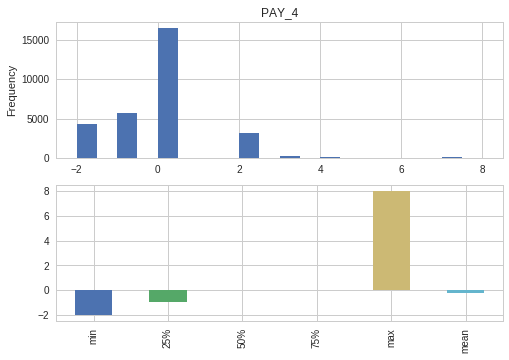

10 PAY_5


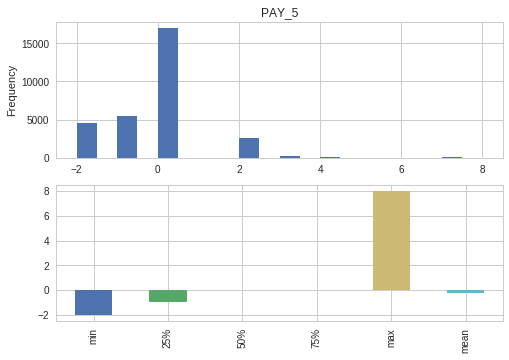

11 PAY_6


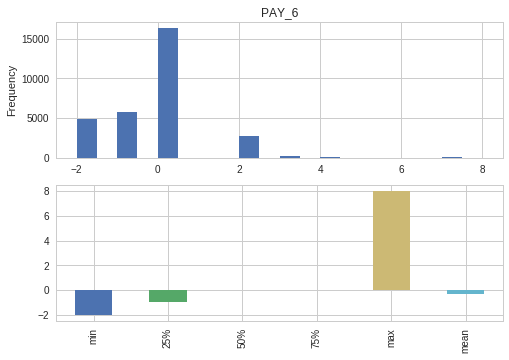

12 BILL_AMT1


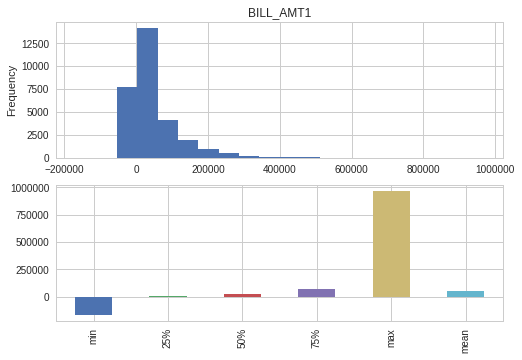

13 BILL_AMT2


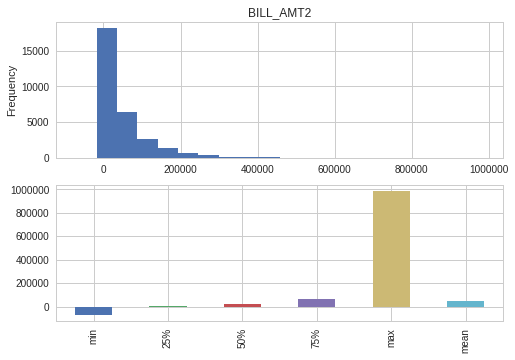

14 BILL_AMT3


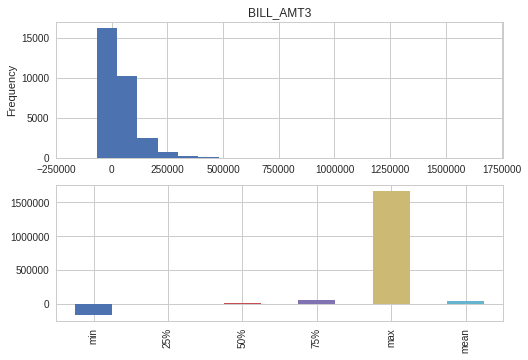

15 BILL_AMT4


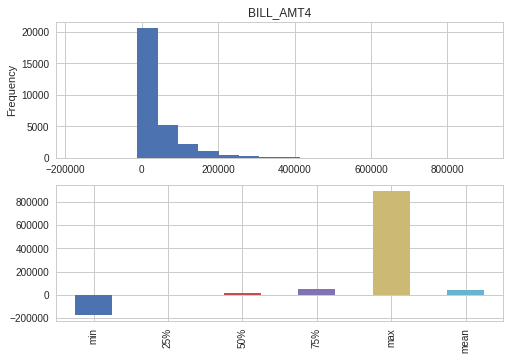

16 BILL_AMT5


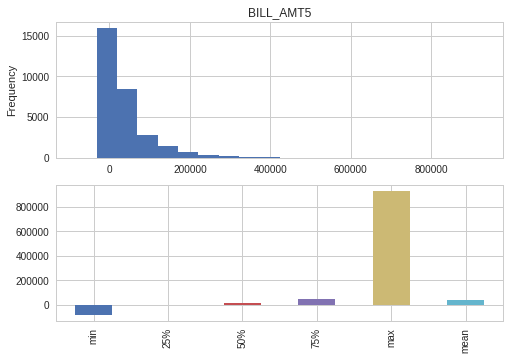

17 BILL_AMT6


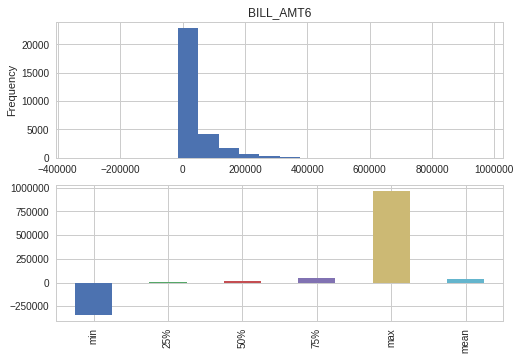

18 PAY_AMT1


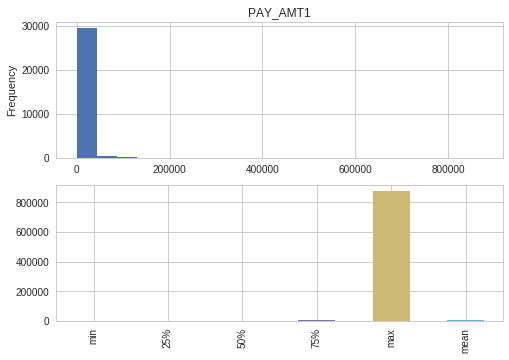

19 PAY_AMT2


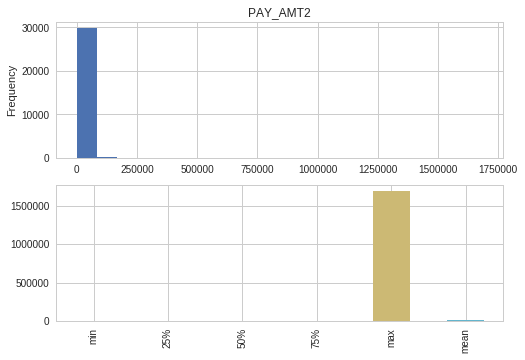

20 PAY_AMT3


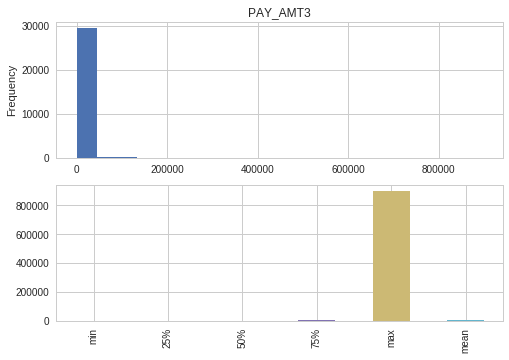

21 PAY_AMT4


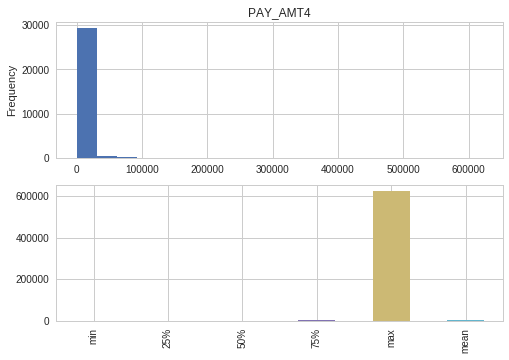

22 PAY_AMT5


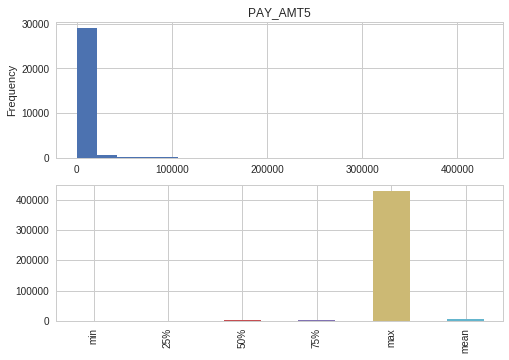

23 PAY_AMT6


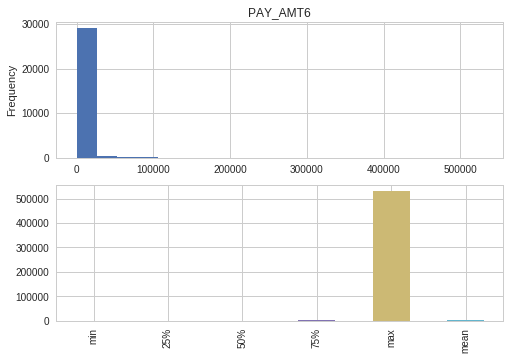

24 default payment next month


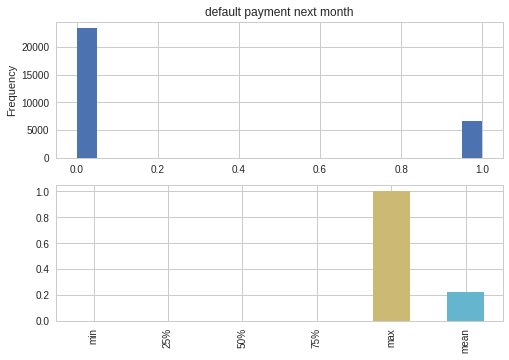

In [102]:
# explore distribution of numerical features
def chart_distribution(df: pd.DataFrame):
    column_distributions = df.describe()
    idx = 0
    for i in column_distributions:
        fig = plt.figure()
        ax11 = fig.add_subplot(211)
        ax21 = fig.add_subplot(212)
        df.loc[:,i].plot(kind="hist", bins=20, title=i, ax=ax11)
        column_distributions.loc[["min", "25%", "50%", "75%", "max", "mean"], i].plot(
            kind="bar", ax=ax21)
        print(idx, i)
        plt.show()
        idx += 1
chart_distribution(data)

In [0]:
# explore distribution of categorical features
def chart_categorical(df: pd.DataFrame):
    idx = 0
    for col in df:
        if df[col].dtype == "object":
            df[col].value_counts().plot(kind="bar")
            print(idx, col)
            plt.show()
            idx += 1
chart_categorical(data)

## Potential data errors to review:
- education should only have classes 1-4, dataset includes classes 0-6
- marriage should only have classes 1-3, dataset includes classes 0-3
- PAY_1 - PAY_6: represent payment delay in months. -1 is duly paid. now includes -2 and 0 as well
- BILL_AMT1 - BILL_AMT6: includes negative numbers and outliers
- PAY_AMT1 - PAY_AMT6: includes outliers

In [104]:
# rename columns
data_clean = data.copy(deep=True)
cols = list(data_clean.columns)
cols = [i.lower() for i in cols]
cols[-1] = "default"
data_clean.columns = cols
data_clean.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

In [105]:
# fix education classes
data_clean.loc[data_clean["education"]==0, "education"] = 4
data_clean.loc[data_clean["education"]==5, "education"] = 4
data_clean.loc[data_clean["education"]==6, "education"] = 4
data_clean.loc[:, "education"].unique()

array([2, 1, 3, 4])

In [121]:
# fix marriage classes
data_clean.loc[data_clean["marriage"]==0, "marriage"] = 3
data_clean.loc[:, "marriage"].unique()

array([1, 2, 3])

## Duplicates

In [107]:
# verify no duplicates exist
data_clean.loc[data_clean.duplicated()==True, ]

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default


## Missing data

In [108]:
def get_missing(df):
    exploration = pd.DataFrame(df.isnull().sum(), 
                 columns=["no_missing"])
    exploration = exploration.merge(
        pd.DataFrame(df.dtypes, columns=["type"]), 
        left_index=True, right_index=True)
    return exploration.loc[exploration["no_missing"]>0].sort_values(
        by="no_missing", ascending=False)
missing = get_missing(data_clean)
print("Column \t # missing values")
for i, row in missing.iterrows():
    print("{} \t {}".format(i, row["no_missing"]))

Column 	 # missing values


## Outliers

In [109]:
bill_cols = ["bill_amt1", "bill_amt2", "bill_amt3", "bill_amt4", "bill_amt5", "bill_amt6"]
data_clean.loc[:,bill_cols].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [110]:
for i in bill_cols:
    bill_gt_600 = data_clean.loc[data_clean[i]>600000, [i]]
    print("col {} len {} where val > 600k. max {}".format(i, bill_gt_600.shape[0], bill_gt_600.max()[0]))

col bill_amt1 len 10 where val > 600k. max 964511
col bill_amt2 len 6 where val > 600k. max 983931
col bill_amt3 len 6 where val > 600k. max 1664089
col bill_amt4 len 4 where val > 600k. max 891586
col bill_amt5 len 2 where val > 600k. max 927171
col bill_amt6 len 2 where val > 600k. max 961664


All high bill data points assumed to be reasonable based on nearby values

In [111]:
for i in bill_cols:
    bill_lt = data_clean.loc[data_clean[i]<-50000, [i]]
    print("col {} len {} where val < 50k. max {}".format(i, bill_lt.shape[0], bill_lt.min()[0]))

col bill_amt1 len 2 where val < 50k. max -165580
col bill_amt2 len 2 where val < 50k. max -69777
col bill_amt3 len 2 where val < 50k. max -157264
col bill_amt4 len 4 where val < 50k. max -170000
col bill_amt5 len 3 where val < 50k. max -81334
col bill_amt6 len 8 where val < 50k. max -339603


All negative bill data points assumed to be reasonable based on nearby values

In [112]:
pay_cols = ["pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6"]
data_clean.loc[:, pay_cols].describe()

,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [113]:
for i in pay_cols:
    pay_gt = data_clean.loc[data_clean[i]>400000, [i]]
    print("col {} len {} where val > 400k. max {}".format(i, pay_gt.shape[0], pay_gt.max()[0]))

col pay_amt1 len 5 where val > 400k. max 873552
col pay_amt2 len 7 where val > 400k. max 1684259
col pay_amt3 len 5 where val > 400k. max 896040
col pay_amt4 len 5 where val > 400k. max 621000
col pay_amt5 len 2 where val > 400k. max 426529
col pay_amt6 len 5 where val > 400k. max 528666


pay_amtx outliers appear valid due to other nearby datapoints

## Correlated features

In [114]:
# show correlation > threshold
def show_feature_correlation(df):
    df_corr = df.corr()
    high_correlations = pd.DataFrame(columns=["f1", "f2", "corr"])
    for i, row in df_corr.iterrows():
        for j in row.index:
            if i == j:
                continue
            high_correlations.loc[len(high_correlations), :] = [i, j, abs(df_corr.loc[i, j])]
    high_correlations = high_correlations.sort_values(by="corr", ascending=False)
    high_correlations = high_correlations.loc[high_correlations.loc[:, "corr"].duplicated(), :]
    return high_correlations
high_correlations = show_feature_correlation(data_clean)
print(high_correlations.head(10))

            f1         f2      corr
324  bill_amt2  bill_amt1  0.951484
400  bill_amt5  bill_amt6  0.946197
375  bill_amt4  bill_amt5  0.940134
349  bill_amt3  bill_amt2  0.928326
350  bill_amt3  bill_amt4  0.923969
423  bill_amt6  bill_amt4  0.900941
326  bill_amt2  bill_amt4  0.892482
301  bill_amt1  bill_amt3  0.892279
398  bill_amt5  bill_amt3   0.88391
372  bill_amt4  bill_amt1  0.860272


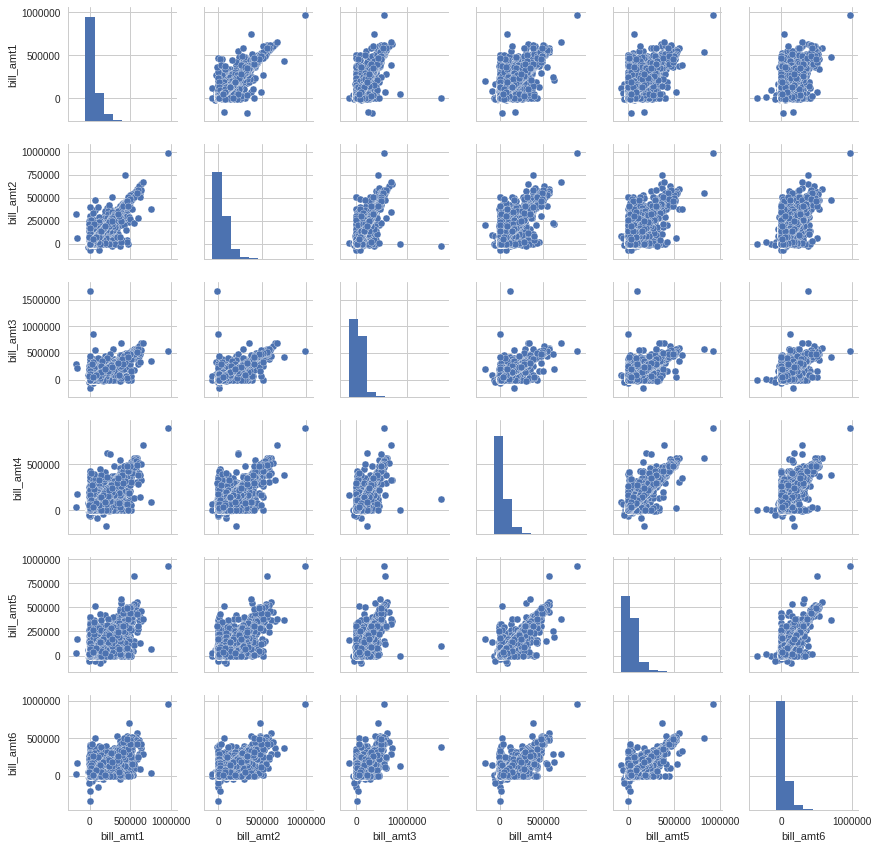

In [115]:
show_corr = 0.90
correlation_cols = set()
for i, row in high_correlations.iterrows():
    if row["corr"] > show_corr:
        correlation_cols.add(row["f1"])
        correlation_cols.add(row["f2"])
correlation_cols
if len(correlation_cols) > 1:
    sns.pairplot(data_clean.loc[:, sorted(correlation_cols)], size=2)
    plt.show()

In [116]:
# remove feature with correlation higher than 'remove_corr'
remove_corr = 0.99
for i in range(len(data_clean.columns)):
    for i, row in high_correlations.iterrows():
        if row["corr"] > remove_corr:
            data_clean = data_clean.drop(row["f2"], axis=1)
            high_correlations = show_feature_correlation(data_clean)
            break
print(high_correlations.head(10))
print(data_clean.columns)

            f1         f2      corr
324  bill_amt2  bill_amt1  0.951484
400  bill_amt5  bill_amt6  0.946197
375  bill_amt4  bill_amt5  0.940134
349  bill_amt3  bill_amt2  0.928326
350  bill_amt3  bill_amt4  0.923969
423  bill_amt6  bill_amt4  0.900941
326  bill_amt2  bill_amt4  0.892482
301  bill_amt1  bill_amt3  0.892279
398  bill_amt5  bill_amt3   0.88391
372  bill_amt4  bill_amt1  0.860272
Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')


## Skewed / Imbalanced data

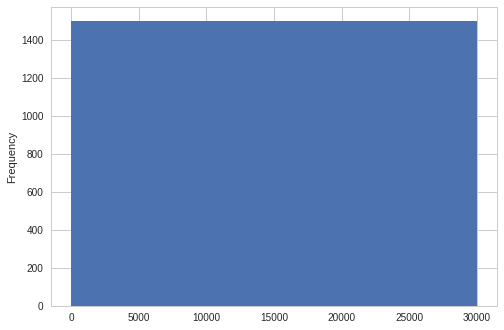

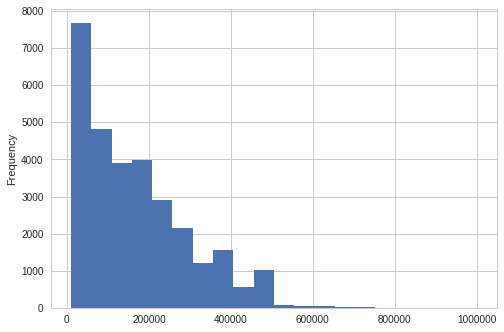

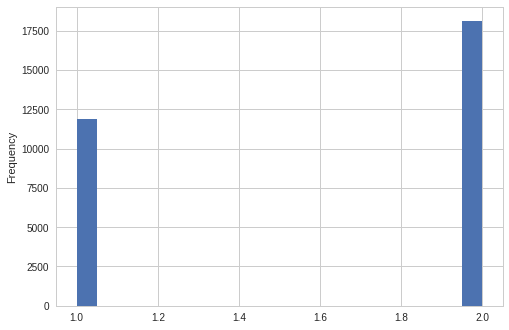

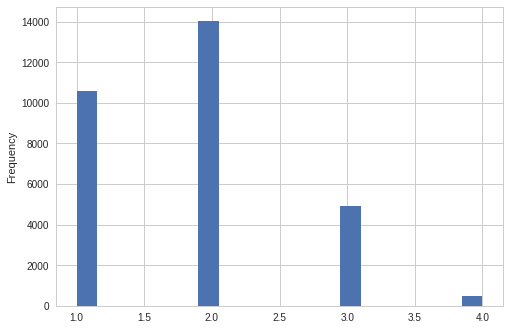

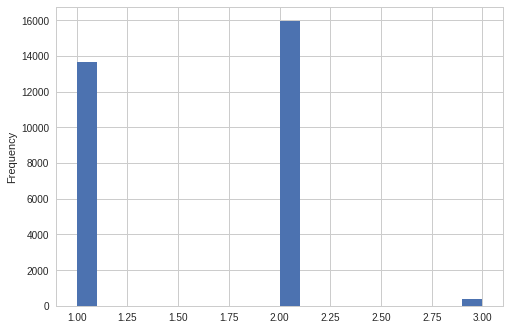

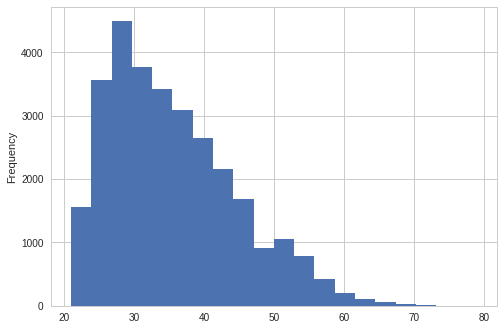

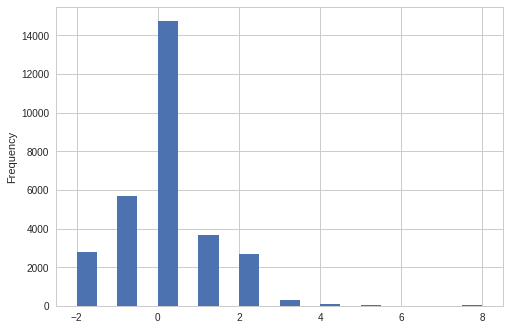

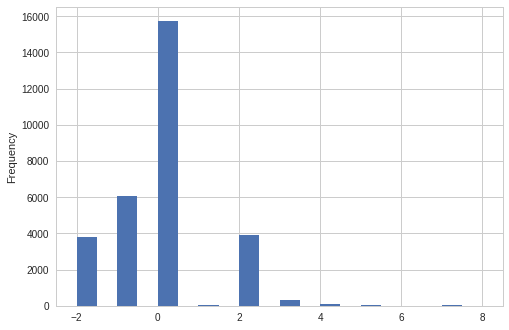

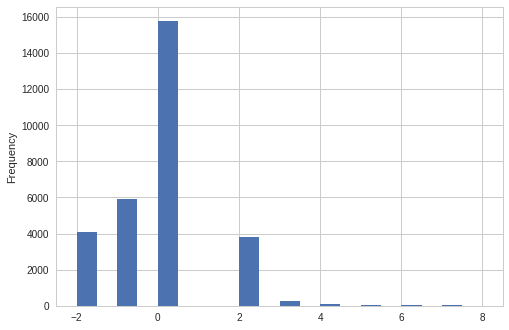

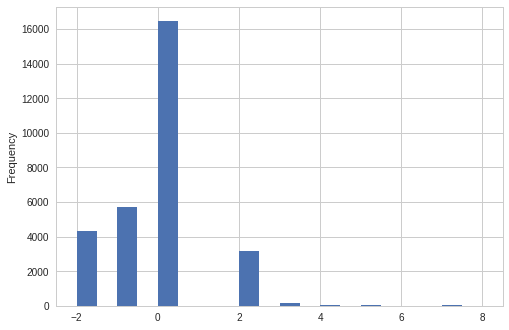

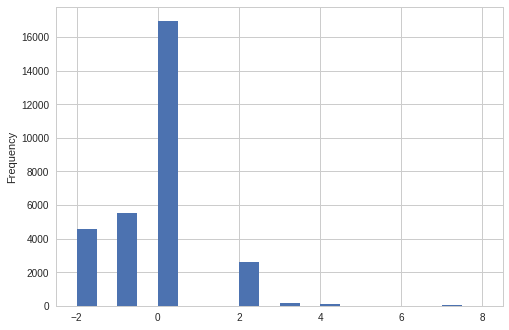

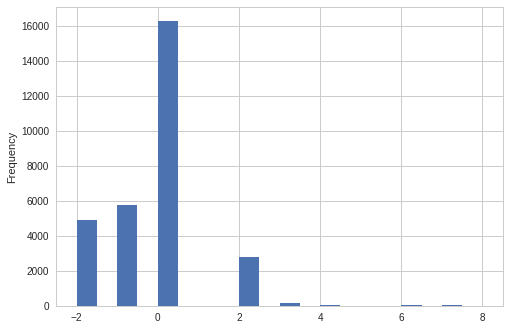

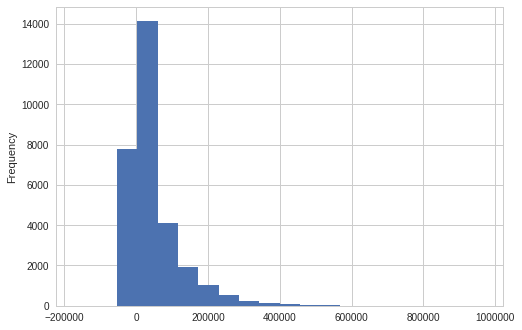

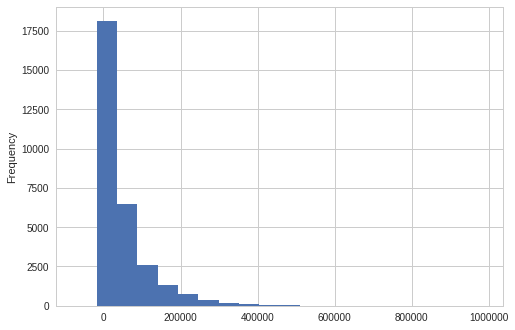

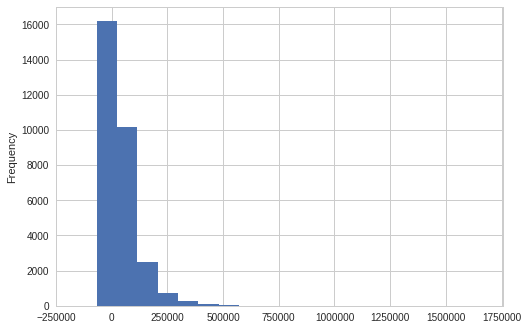

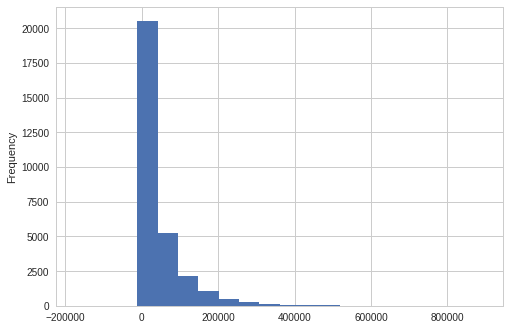

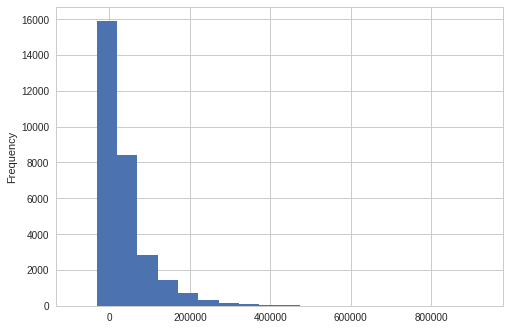

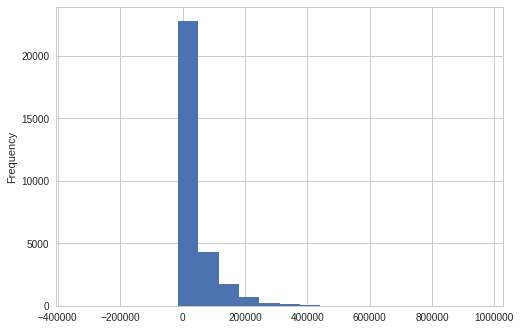

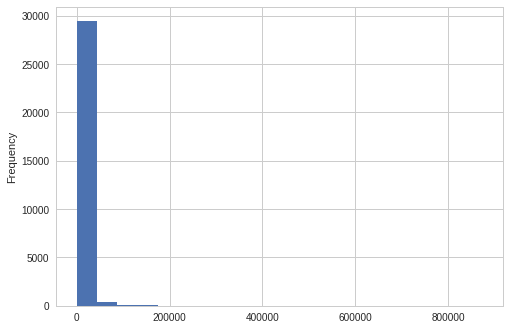

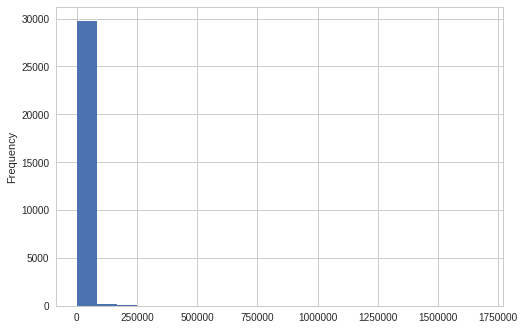

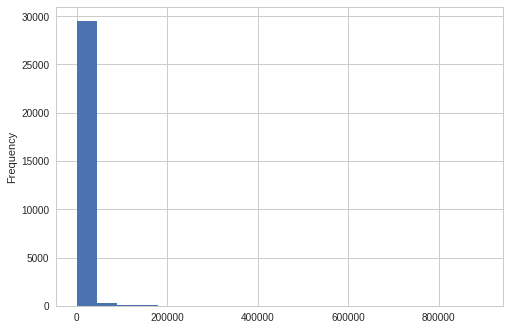

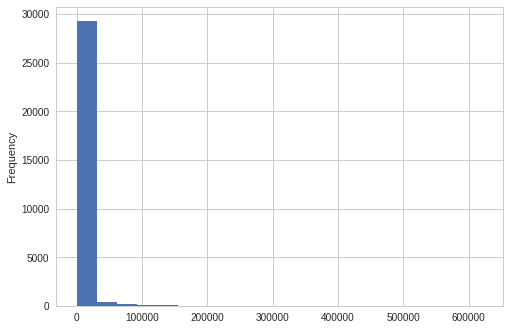

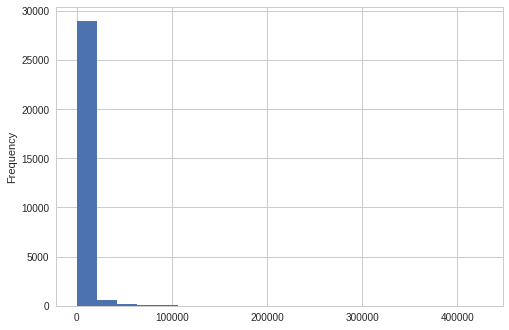

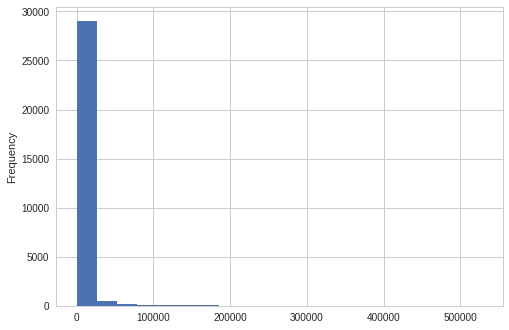

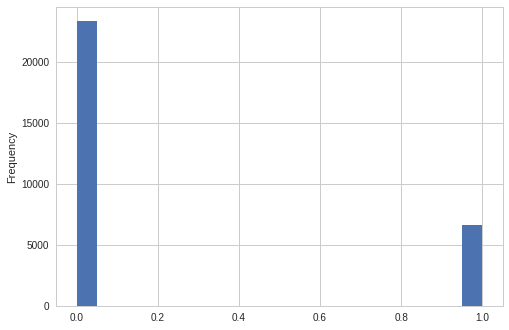

In [117]:
for i in data_clean.columns:
    data_clean.loc[:, i].plot(kind="hist", bins=20)
    plt.show()

## Final dataset

In [118]:
data_clean.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [119]:
data_clean.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object')

## Notes for training
- convert columns: sex, education, marriage to categorical
- power transform (log) columns: limit_bal, bill_amtx, pay_amtx

## Save datasets

In [0]:
loc = "/content/gdrive/My Drive/Colab Notebooks/uci-credit-card-defaults/data/defaults_clean.csv"
data_clean.to_csv(loc, index=False)
# verify file saved correctly
data_clean_load = pd.read_csv(loc)
assert data_clean_load.shape == data_clean.shape